In [3]:
import expt
import matplotlib.pyplot as plt

In [18]:
df = expt.scan("runs/2024-04-25/", ["kwargs", "time"])
df

  0%|          | 0/63 [00:00<?, ?it/s]

,kwargs/run_dir,kwargs/dev,kwargs/master_addr,kwargs/master_port,kwargs/backend,kwargs/device,kwargs/num_elements,kwargs/world_size,kwargs/warmup_steps,time/time (s)
kwargs/timestamp,,,,,,,,,,
1714100420656229342,runs/2024-04-25,0,localhost,12355,gloo,cpu,128000,2,5,0.001168
1714100424232766585,runs/2024-04-25,0,localhost,12355,gloo,cpu,128000,4,5,0.002521
1714100428445083210,runs/2024-04-25,0,localhost,12355,gloo,cpu,128000,6,5,0.003800
1714100433586905852,runs/2024-04-25,0,localhost,12355,gloo,cpu,250000,2,5,0.002001
1714100437394077870,runs/2024-04-25,0,localhost,12355,gloo,cpu,250000,4,5,0.004022
...,...,...,...,...,...,...,...,...,...,...
1714100896432334526,runs/2024-04-25,0,localhost,12355,nccl,cuda,125000000,4,5,0.000186
1714100906603343934,runs/2024-04-25,0,localhost,12355,nccl,cuda,125000000,6,5,0.000181
1714100918576283994,runs/2024-04-25,0,localhost,12355,nccl,cuda,250000000,2,5,0.000180


saved at fig/dist_comm_single_node.pdf


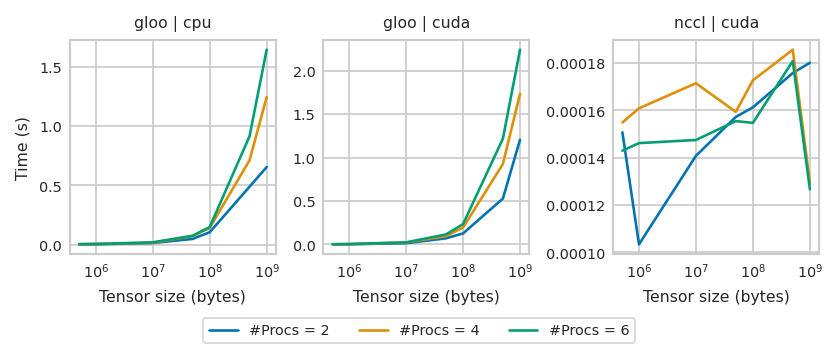

In [23]:
fig, axs = plt.subplots(
    1,
    3,
    figsize=(0.95 * expt.LINE, 0.35 * expt.LINE),
    sharex=True,
    sharey=False,
    layout="constrained",
)
for backend, device, ax in [
    ("gloo", "cpu", axs[0]),
    ("gloo", "cuda", axs[1]),
    ("nccl", "cuda", axs[2]),
]:
    for world_size in [
        2,
        4,
        6,
    ]:
        qdf = df.query(
            f"`kwargs/backend` == '{backend}' and `kwargs/device` == '{device}' and `kwargs/world_size` == {world_size}"
        )
        x = qdf["kwargs/num_elements"] * 4
        y = qdf["time/time (s)"]
        ax.plot(x, y, label=f"#Procs = {world_size}" if backend == "nccl" else None)
        ax.set_xscale("log")
        # ax.set_yscale("log")
        ax.set_xlabel("Tensor size (bytes)")
        ax.set_title(f"{backend} | {device}")
        fig.show()
axs[0].set_ylabel("Time (s)")
fig.legend(ncols=3, loc="upper center", bbox_to_anchor=(0.5, 0))
expt.save_fig(fig, "dist_comm_single_node")